# Chapter 2: Computing and Displaying data

## 2.1 Spherical Astronomy

### 2.1.1 Declination of the Sun
$$d = - \arcsin(\sin \epsilon_0 \cos (\frac{360}{365.24} \times (N + 10)))$$


In [2]:
# N is the difference of the days from first day of the year (1st jan)
# find the declination of the sun given N and the formula above

import math

N = 171 # day of the solstice 20th of June in 2020 which is 171 days away from 1st jan
omega = 2 * math.pi / 365.24 # angular velocity in radian/day same as 360/365.24
ecl = math.radians(23.44) #obliquity of the ecliptic 

# approximate expression of sun declination **refer to the formula above
delta = -math.asin( math.sin(ecl) * math.cos( omega * (N +10)))
print("declination of the sun is {:.2f} degrees".format(math.degrees(delta))) # here we need to convert the value from radian to degrees

declination of the sun is 23.43 degrees


#### compute the declination for several days, How?

In [4]:
# use numpy arrays
import numpy as np
N = np.array([79, 171, 265, 355]) # equinoxes and solstices in 2020
print(N)
print(N.size)
print(N.dtype)
print(N[1])
print(N[-3])

[ 79 171 265 355]
4
int32
171
171


In [6]:
# compute the declination of the sun for all given days at once
delta = -np.arcsin( math.sin(ecl) * np.cos( omega * (N +10)))
print(np.degrees(delta))

[ -0.9055077   23.43035419  -0.41950731 -23.43978827]


In [7]:
# breaking down the same code above, we get:
temp = N +10 # add 10 to each element in the array
print(temp)
print(temp.dtype)

temp = omega * temp # perform element-wise multiplication
print(temp)
print(temp.dtype)

temp = math.sin(ecl) * np.cos(temp)
print(temp)

delta = -np.arcsin(temp)
print(np.degrees(delta))

[ 89 181 275 365]
int32
[1.53105764 3.11372396 4.73079608 6.27905661]
float64
[ 0.01580343 -0.39763404  0.00732172  0.39778512]
[ -0.9055077   23.43035419  -0.41950731 -23.43978827]


In [8]:
# display elements in the array
for element in delta:
    print(" the declination is {:6.2f} degrees".format(math.degrees(element)))

 the declination is  -0.91 degrees
 the declination is  23.43 degrees
 the declination is  -0.42 degrees
 the declination is -23.44 degrees


In [9]:
# better way to display data
print("i    dat    delta {deg}")
for i, val in enumerate(delta):
    print("{1:d}    {2:3d}    {0:8.2f}".format(math.degrees(val), i, N[i]))

i    dat    delta {deg}
0     79       -0.91
1    171       23.43
2    265       -0.42
3    355      -23.44


In [10]:
# even better
print("dat    delta {deg}")
for row in zip(N,delta):
    print("{0:3d}    {1:8.2f}".format(row[0], math.degrees(row[1])))

dat    delta {deg}
 79       -0.91
171       23.43
265       -0.42
355      -23.44


### 2.1.3 Diurnal Arc

#### The movement of a star on the sky that we can see from earth that has an arc shape is called the Diurnal Arc 
#### Betelgeuse is a red giant star in Orion Constellation, we can find find its information using astropy database

In [1]:
from astropy.coordinates import SkyCoord, EarthLocation
betelgeuse = SkyCoord.from_name('Betelgeuse')
print(betelgeuse) # ra: the right ascension, dec: declination of the star

<SkyCoord (ICRS): (ra, dec) in deg
    (88.79293899, 7.40706399)>


In [2]:
# directly access the star's declination
delta = betelgeuse.dec
print(delta) # angular coordination consisting of: degree, arc minutes and seconds

7d24m25.430382s


In [7]:
# set the geographical position in the center of Makkah 21° 23' 20.76" N, 39° 51' 28.44" E 
import astropy.units as u
observer = EarthLocation(lat = 21*u.deg+23*u.arcmin+20.76*u.arcsec, lon=39*u.deg+51*u.arcmin+28.44*u.arcsec)
phi = observer.lat # observer latitude

The hour which the star disappears from the sky is called hour set and can be computed by:
$$ H_{set} = \arccos(-\tan \delta \tan \phi)$$

In [8]:
# using the formula above we can calculate the hour set from a viewpoint of an observer un Makkah
import math
hour_set = math.acos( - math.tan(delta.radian) * math.tan(phi.radian)) # convert from degrees to radian

#### The sidereal time of the object when its apparent on the sky, also called the diurnal arc length
$$ T = 2 H_{set} $$

In [9]:
# apply convertions since the sidereal day is 4 minutes shorter than a solar day
T = (math.degrees(2 * hour_set) / 360) * u.sday
print("the diurnal arc length is {:.2f}".format(T.to(u.h))) # this represents the daylight length in makkah! 

the diurnal arc length is 12.36 h


In [10]:
# find the daylight length of makkah through out the whole year
import numpy as np

N = np.arange(365) # make an array that represents days of the year -1
omega = 2 * math.pi / 365.24 # the angular velocity of earth
ecl = math.radians(23.44) # obliquity of the ecliptic
delta = -np.arcsin(math.sin(ecl) * np.cos(omega * (N + 10))) # declination of the sun all the year
h_set = np.arccos(-np.tan(delta) * math.tan(phi.radian)) # hour set 
T = (np.degrees(2 * h_set)/ 360) * u.sday.to(u.h) # convert to solar hours for all days

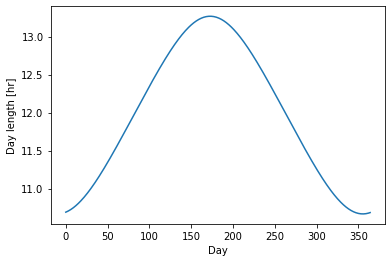

In [11]:
# plot data created of daylight length in Makkah
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(N, T)
plt.xlabel("Day")
plt.ylabel("Day length [hr]")
plt.savefig("Makkah_day_length.pdf")

In [13]:
print("Maximum daylight length in Makkah is {:5.2f} h ".format(T.max()))
print("Minimum daylight length in Makkah is {:5.2f} h ".format(T.min()))

Maximum daylight length in Makkah is 13.27 h 
Minimum daylight length in Makkah is 10.67 h 


In [14]:
# A city located in Norway, called Longyearbyen has the latitude 78d13m
phi = math.radians(78+13/60) # we can convert the latitude to radians witout having to use of exact location with EarthLocation

h_set = np.arccos(-np.tan(delta) * math.tan(phi))
T = (np.degrees(2 * h_set) / 360 * u.sday.to(u.h))

c:\Users\KHELLO\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in arccos
  after removing the cwd from sys.path.


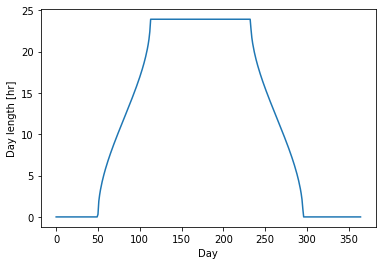

In [15]:
tmp = np.clip(-np.tan(delta) * math.tan(phi), -1.0, 1.0)
h_set = np.arccos(tmp)
T = (np.degrees(2*h_set)/360 * u.sday.to(u.h))
plt.plot(N, T)
plt.xlabel("Day")
plt.ylabel("Day length [hr]")
plt.savefig("Longyearbyen_day_length.pdf")

#### from the graph, we find that in the norwagian town Longyearbyen during summer, the day light would be 24 hours, and no night!, but at winter, it is the exact opposite
#### this is due to the daylight length being affected by the latitude of the sun observer
#### We can compare the data we have about Makkah and Longyeardyen 

In [16]:
phi = {"Makkah" : observer.lat.radian,
       "Longyearbyen" : math.radians(78 + 13 /60)}
print(phi["Makkah"])

0.3733102190383192


In [17]:
# add more cities
phi["New York"] = math.radians(40 + 43 / 60)
phi["Bangkok"] = math.radians(13 + 45 / 60)
len(phi)

4

Makkah: 21.39 deg
Longyearbyen: 78.22 deg
New York: 40.72 deg
Bangkok: 13.75 deg


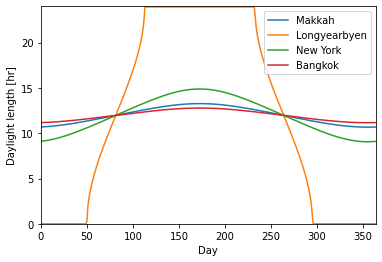

In [19]:
for key in phi:
    print(key + ": {:.2f} deg".format(math.degrees(phi[key])))
    h_set = np.arccos(np.clip(-np.tan(delta) * math.tan(phi[key]), -1.0, 1.0))
    T = (np.degrees(2*h_set)/360 * u.sday.to(u.h))
    plt.plot(N, T, label = key)
plt.xlabel("Day")
plt.xlim(0, 364)
plt.ylabel("Daylight length [hr]")
plt.ylim(0, 24)
plt.legend(loc = "upper right")
plt.savefig("daylength.pdf")

#### From the graph, we can conclude that the closer to the Equator the more balance between the day and night length will be, for example, Makkah and Bangkok have approximatly 12-13 hours of day and night, While at the polar side Longyearbyen have big variation throughout the year in daylight length. 